<a href="https://colab.research.google.com/github/SunidhiParvatikar/Detection_of_Liver_Disease_Machine_learning/blob/main/Copy_of_Liverdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import  pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('liver.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#Reading datasets
x = df.drop('Dataset',axis = 1)
y = df['Dataset']

print("Total no of sample:",df.shape[0],'\nNo. of features:',df.shape[1])

Total no of sample: 583 
No. of features: 11


In [ ]:
#Remove duplicates
duplicates = df[df.duplicated(keep = False)]
duplicates

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [ ]:
print('No of duplicate values: ',duplicates.shape[0],'\nSize of data: ',df.shape)

No of duplicate values:  26 
Size of data:  (583, 11)


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
df.shape

(579, 11)

In [ ]:
#Scaling features 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#1: Liver problem , 0: No Problem
df['Dataset'] = le.fit_transform(~df['Dataset'])
df['Dataset'].unique()

x = df.drop('Dataset',axis=1)
y = df['Dataset']


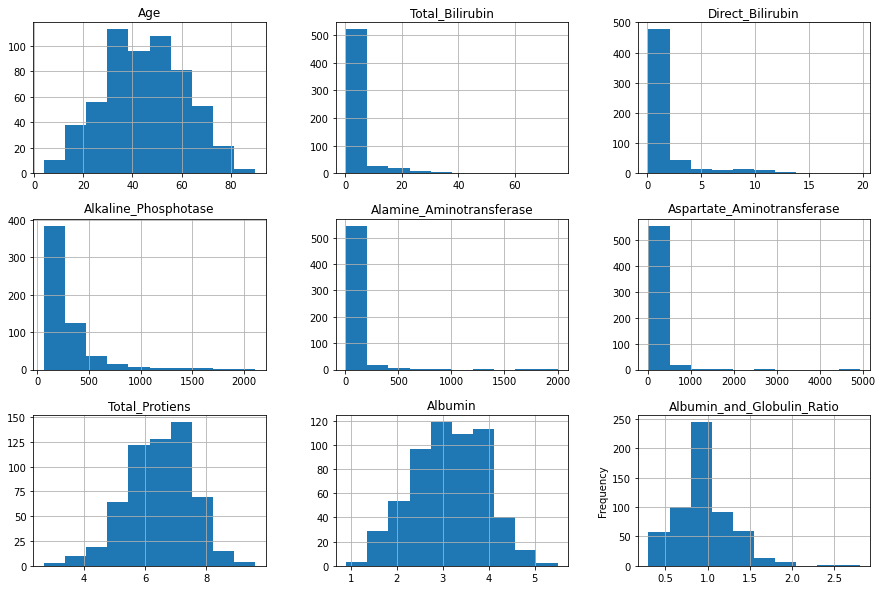

In [ ]:
#Visualization
x.hist(figsize=(15,10))
plt.ylabel('Frequency')
plt.show()

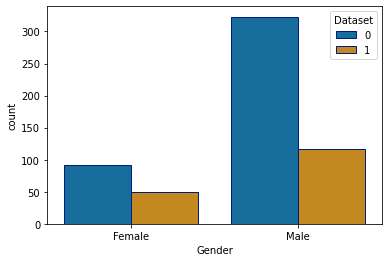

In [ ]:
sns.countplot(x = 'Gender',hue='Dataset' , data = df, palette='colorblind', edgecolor=sns.color_palette('dark',n_colors=1) )
plt.show()

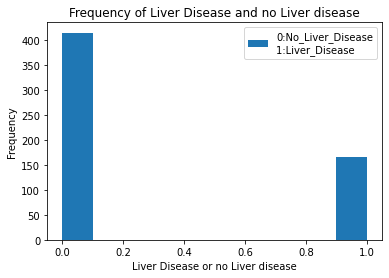

In [ ]:
plt.hist(y,label='0:No_Liver_Disease\n1:Liver_Disease ')
plt.xlabel("Liver Disease or no Liver disease")
plt.ylabel('Frequency')
plt.title("Frequency of Liver Disease and no Liver disease")
plt.legend()
plt.show()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

x = df.drop('Dataset',axis=1)
y=df['Dataset']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

Accuracy:  0.7586206896551724
Precision:  0.875


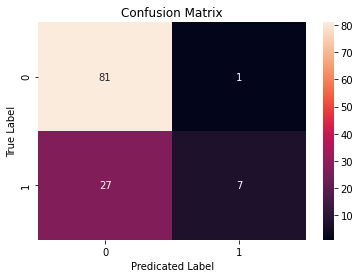

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1) 
reg = LogisticRegression(solver='newton-cg')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.title("Confusion Matrix")

print("Accuracy: ",accuracy)
print("Precision: ",metrics.precision_score(y_test,y_pred))

